# Introdução ao aquecimento global

(INTRODUÇAO - MELHORAR DEPOIS)

Esse notebook será uma introdução ao tópico de aquecimento global. Como este é um tópico extremamente complexo, não pretendo cobrir todos os assuntos relevantes, somente aqueles fundamentais para construir um entendimento básico sobre a problemática. O intuito é apenas mostrar o ínicio, para que depois o leitor interessado tenha uma base para futuras pesquisas.

Dessa forma, analizarei os seguintes temas:

* O por quê do aquecimento global ser importante;
* Diferentes formas de quantificar o impacto de uma nação;
* Como países desenvolvidos se diferem daqueles em desenvolvimento;
* Notas sobre as fontes renováveis, com foco na solar e nuclear.

## Introdução ao estudo

Nessa seção, vou explicar as diferentes bases de dados utilizadas, e no final mostrar o método que usei para explorar aos datasets ao longo do notebook. A maioria dos datasets foi obtido pelo [Our World in Data](https://ourworldindata.org/energy).

### Bases de dados

#### World Energy Consumption

Essa será o principal dataset usado. Nele, podemos obter dados de cada país sobre:

* Consumo, produção e importação energética;
* População;
* GDP.

Cada uma das categorias energéticas está disponibilizada de 4 formas diferentes: per capita, porcentagem, mudança anual e em relação a economia. Também podemos filtrar quais fontes energéticas queremos incluir na análise, como eólica, solar, ou carvão, por exemplo.

Link: https://www.kaggle.com/datasets/pralabhpoudel/world-energy-consumption

#### CO2 Emissions

Dados inclusos, por país:

* Produção de CO2, e de onde ele veio (carvão, petróleo, gás natural ...);
* Produção de outros gases efeito estufa, como metano e óxido nitroso;
* População;
* GDP.

Assim como o último dataset, este também inclui os dados das mesmas 4 formas.

Link: https://ourworldindata.org/co2-and-other-greenhouse-gas-emissions

#### CO2 concentration

Contém dados sobre a concentração de CO2 na atmosfera desde 1958 obtidos pelo Observatório Mauna Loa.

Link: https://www.kaggle.com/datasets/ucsandiego/carbon-dioxide

#### Country gdp

Contém o PIB de todos os países e regiões, mas o intervalo de tempo para cada país pode variar. Por isso, acabei optando por não ter um intervalo tão grande, para ter dados completos sobre o maior número de países possível. 

O dataset salvo foi modificado; os dados sobre as diferentes regiões foram removidos, deixando somente aqueles sobre os países. Fonte: Banco Mundial.

Link: https://datahub.io/core/gdp#resource-gdp

#### EPA sea level

Contém o nível do mar absoluto ao longo de 1880-2014. Dados fornecidos pelo US Environmental Protection Agency.

Link: https://datahub.io/core/sea-level-rise#readme

#### Food Production

Contém o custo em CO2 para produzir vários alimentos. Esse custo inclui:

* Uso de terra;
* Alimentação animal;
* Tempo de crescimento;
* Processamento;
* Transporte;
* Empacotamento;
* Vendas

A unidade usada é Kg de CO2 / Kg do alimento. O estudo levou em conta diferentes gases estufa, e transformou para o equivalente a CO2.

Link: https://www.kaggle.com/datasets/selfvivek/environment-impact-of-food-production

#### Global Temperatures

Contém dados sobre a temperatura terrestre, além de terrestre/oceânica. Fonte: Berkeley Earth Surface Temperature Study.

Link: https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data

#### Human development index

Contém dados sobre o HDI de cada país, no intervalo de 1980 até 2017. Contudo, os intervalos tendem a ser irregulares antes de 2000, então eu usei de 2000-2017. Fonte: United Nations Development Programme.

Link: https://ourworldindata.org/human-development-index

#### Levelized cost of energy

Contém o custo, em dólar(2019) por kWh, de diferentes energias renováveis. Esse custo leva em conta a manutenção das usinas, bem como seu tempo útil de vida.

Link: https://ourworldindata.org/grapher/levelized-cost-of-energy?country=~OWID_WRL

### Introdução à metodologia

Agora, vou exemplificar o método usado ao longo do notebook para pegar dados dos datasets.

Primeiro, as bibliotecas necessárias:

In [2]:
# imports padrões
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as pld
import pandas as pd
import seaborn as sns
import math # Para usar o math.isnan()


Bad key "text.kerning_factor" on line 4 in
c:\Users\Leonardo\miniconda3\envs\env\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


Agora, vou definir a lista dos países que vão ser analisados na seção 2. Como o foco vai ser analisar cada país, não podemos ter todos, já que a visualização de dados seria comprometida.

Observe que não colocarei todos os países considerados como potências econômicas. Contudo, os países da lista a seguir já nos darão uma boa ideia do cenário atual.

In [3]:
potencias = ["United States", "United Kingdom", "France", "Germany", "China", "India", "Brazil", "Japan"]

Perceba que também coloquei o Brasil na lista, para nos compararmos com os outros países.

A seção 2 foi feita de forma que, caso altere a lista acima, novos países serão analisados, sem ter problemas de compilação. As partes nas quais você deve mudar algum parâmetro caso mude essa lista ficarão explícitas.

Agora, vamos mostrar um exemplo de como faremos um gráfico com os dados de um dos datasets que temos.

In [4]:
# Primeiro, vamos mostrar como iterar sobre as listas e colunas

world_energy_data = pd.read_csv("./data./World Energy Consumption.csv")
for index,row in world_energy_data.iterrows():
    if row.country in potencias and row.year == 1999:
        print(row.population)

172319008.0
1281515008.0
58704000.0
81390000.0
1038057984.0
127326000.0
58716000.0
278548000.0


Caso mude a lista de potências, verifique se o número de output corresponde ao número de países listados, para verificar que digitou os nomes dos países corretamente.

Agora que conseguimos esses dados, vamos montar o gráfico que mostra a população dos países da lista  no período de 1990-1999.

<Figure size 3600x2400 with 0 Axes>

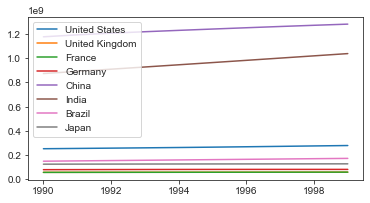

In [47]:
# Criando o dicionário que vai segurar os dados de cada país
dict_resultado = {}

# Primeiro vamos popular o dicionário com as keys dos países desejados
for country in potencias:
    dict_resultado[country] = []

# Colocando os dados no dicionário
for index, row in world_energy_data.iterrows():
    if row.country in potencias and row.year in range(1990, 2000): # Importante!!! Explicado em baixo
        dict_resultado[row.country].append(row.population)

# Fazendo o gráfico com o dicionário

# aumentando a qualidade gráfica dos gráficos
plt.figure(dpi=600)
plt.subplots(figsize=(6,3))

for country, population in dict_resultado.items():
    plt.plot(range(1990, 2000), population, label=country)
    plt.legend(loc="upper left")

OBS: Quando vamos botar os dados nas listas, não nos preocupamos em organizá-los cronologicamente. A princípio, isso seria uma prática ruim, visto que seria muito fácil ficarmos com dados na seguinte estrutura:

`[(dados de 2000), (dados de 2002), (dados de 2005), (dados de 2001), (dados de 2003)]`

Contudo, os CSVs utilizados foram organizados previamente de forma cronológica, então não precisamos nos preocupar com isso, já que o loop vê as linhas de cima para baixo, da mesma forma que elas foram organizadas. Dessa forma, irei usar a técnica com range(), que permite a iteração sobre o csv de forma mais rápida.

Nossa análise de dados, portanto, sempre será feita nesse mesmo molde:

1. Ler o csv do dataset, e armazenar seus dados;
2. Criar um dicionário, com listas para guardar as informações de cada país;
3. Iterar sobre os dados a procura de certa informação;
4. Guardar informações no dicionário;
5. Usar Matplotlib para fazer um gráfico desse dicionário.

Agora que demonstramos o worflow geral que será feito para analisar os dados, estamos prontos para começar o estudo.

## Qual a importância do aquecimento global?

Cientistas afirmam que o aumento da concentração de gases estufa na atmosfera está diretamente ligado com todas as mudanças climáticas que estamos vivenciando nos últimos anos. Nessa seção, analisaremos o quão grave esses efeitos realmente são, e se eles têm alguma correlação com a emissão de gases como CO2 na atmosfera ou não.

### O quanto a temperatura realmente aumentou?

Supostamente, as temperaturas devem ter aumentado nas últimas décadas para podermos começar a considerar que o aquecimento global é real. Vamos analisar a mudança da temperatura média entre a terra e o oceano, no período de 1850 até 2015.

In [6]:
temperature_data = pd.read_csv("./data/GlobalTemperatures.csv")

dict_land_temperature_years = {year:[] for year in range(1850, 2016)}

for index, row in temperature_data.iterrows():
    ano = int(row["dt"][:4:])
    if ano >= 1850:
        dict_land_temperature_years[ano].append(row.LandAndOceanAverageTemperature)

for ano, temperaturas in dict_land_temperature_years.items():
    dict_land_temperature_years[ano] = np.average(temperaturas)

<Figure size 3600x2400 with 0 Axes>

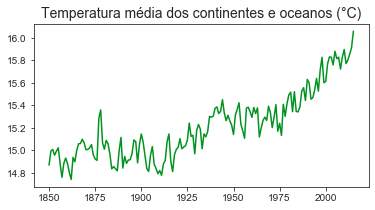

In [55]:
# Gráfico
plt.figure(dpi=600)
plt.subplots(figsize=(6,3))

sns.set_style("ticks")
plt.title("Temperatura média dos continentes e oceanos (°C)", fontsize=14)
sns.lineplot(x = list(dict_land_temperature_years.keys()), y = list(dict_land_temperature_years.values()), color="#00941F");

A média da temperatura da terra e dos oceanos aumentou em por volta de 1 grau. Isso pode não parecer muito, mas temos que ter em mente 3 fatores:

* Os ecossistemas terrestres são extremamente sensíveis à mudanças de temperatura;
* O gráfico mostra que a temperatura só tende a continuar a subir;
* Se continuarmos assim, o aquecimento global se tornará auto suficiente.

O último ponto é de extrema importância. Quanto mais quente a Terra fica, mais geleiras derreterão. Essas geleiras são importantes, pois devido à serem brancas, elas refletem grande parte da radiação solar de volta ao espaço. Sem elas, aprisionaremos cada vez mais o calor do Sol. Além disso, quanto maior a temperatura dos oceanos, mais eles evaporarão. O vapor d'água é um dos gases estufa mais eficientes em prender calor. Portanto, conforme a Terra fica mais quente, mais esses 2 fenômenos ocorrem, que ajudam a esquentar ainda mais a Terra.

O derretimento das geleiras também traz outra consequência grave do aquecimento global: o aumento do nível do mar. Mas, se só temos geleiras nos polos da Terra, como seu derretimento pode aumentar de forma perceptível o nível do mar?

### O quanto o nível dos mares aumentou?

O oceano é gigantesco: cobre 70% da superfície terrestre. É difícil acreditar que algumas geleiras nos polos contenham tanta água ao ponto de, ao derreterem, não só aumentarem de forma perceptível o nível dos mares, como também aumentarem em um nível que ameaça a nossa sobrevivência. Vamos ver o quanto foi o aumento de 1880 até 2014.

In [8]:
sea_level_data = pd.read_csv("./data/epa-sea-level.csv")

dict_sea_level = {year:[] for year in range(1880, 2015)}

for index, row in sea_level_data.iterrows():
    sea_level_year = int(row.Year[:4])
    dict_sea_level[sea_level_year] = row["CSIRO Adjusted Sea Level"]*25.4 # Para converter polegadas-mm

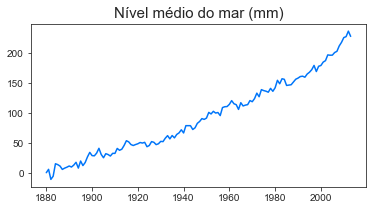

In [59]:
plt.subplots(figsize=(6,3))
plt.title("Nível médio do mar (mm)", fontsize=15)
plt.plot(list(dict_sea_level.keys()), list(dict_sea_level.values()), color="#0075F9");

De novo vemos uma clara tendência. O nível dos mares subiu aproximadamente 9 polegadas (210 mm) desde 1880.

Se continuarmos assim, em um futuro próximo cidades costeiras serão inundadas, e a produção de alimentos será comprometida.

Contudo, como podemos ter certeza de que esses 2 aumentos não são apenas uma coincidência, parte de um ciclo natural da Terra?

### Como a mudança climática se relaciona com o CO2?

Vimos que a temperatura e o nível dos mares aumentaram consistentemente nas últimas décadas, mas isso poderia se dar a vários fatores. Por exemplo, muitos afirmam que isso é simplesmente uma "fase cíclica" pela qual a Terra passa, como a Era do Gelo. Nesta seção, vamos correlacionar os dois últimos gráficos com o aumento da concentração de CO2 na atmosfera.

In [10]:
co2_concentration_data = pd.read_csv("./data/co2-concentration.csv")

dict_co2_concentration = {year:[] for year in range(1958, 2018)}


for index, row in co2_concentration_data.iterrows():
    co2_concentration_ano = int(row.Year)
    if row["Carbon Dioxide (ppm)"] > 0: # Vendo se tem dados
        dict_co2_concentration[co2_concentration_ano].append(row["Carbon Dioxide (ppm)"])
    else: # Se não tem, adicionamos a média
        if len(dict_co2_concentration[co2_concentration_ano]) > 0:
            dict_co2_concentration[co2_concentration_ano].append(np.average(dict_co2_concentration[co2_concentration_ano]))
            
for ano, concentracao in dict_co2_concentration.items():
    dict_co2_concentration[ano] = np.average(concentracao)

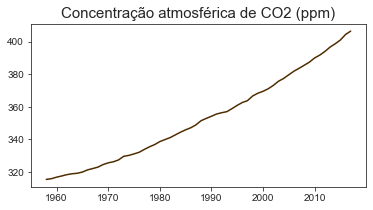

In [60]:
plt.subplots(figsize=(6,3))
plt.title("Concentração atmosférica de CO2 (ppm)", fontsize=15)
plt.plot(list(dict_co2_concentration.keys()), list(dict_co2_concentration.values()), color="#4E2C00");

Podemos claramente ver que a concentração de CO2 na atmosfera está aumentando.

Mas, se a única coisa que devemos fazer para parar esse aquecimento é cortar o uso de combustíveis fósseis, por quê ainda não o fizemos? Afinal, já temos as tecnologias de energias alternativas.

### Por quê não simplesmente ... paramos de poluir?

Atualmente, temos tecnologias que conseguem tirar energia de fontes limpas como solar, eólica e hidrelétrica. Se elas estão disponíveis, o que estamos esperando para começar a transição de fontes fósseis para renováveis?

Primeiro, vamos analisar a razão para todo esse CO2 expelido: sustentar cada vez mais humanos. Praticamente tudo com que interagimos no nosso cotidiano requer energia para funcionar ou ser feito. Mas, para sermos mais objetivos, vamos somente analisar o único aspecto do qual não podemos nos livrar: alimentação. Vejamos quanto CO2 alguns dos nossos alimentos custam, quando incluímos todos os processos, desde o início até a plateleira do supermercado.

In [12]:
food_data = pd.read_csv("./data/Food_Production.csv")
alimentos = {}

for index, row in food_data.iterrows():
    alimentos[row["Food product"]] = row["Total_emissions"]

In [13]:
# Vamos fazer um dataframe dos nossos dados, para podermos organizá-los
comida_series = pd.Series(alimentos.keys())
emissao_series = pd.Series(alimentos.values())

comida_e_emissoes = {
    "Alimento":comida_series,
    "Emissão":emissao_series
}

alimentos_df = pd.DataFrame(comida_e_emissoes)
sorted_alimentos_df = alimentos_df.sort_values("Emissão", ascending=False, axis=0)

<Figure size 3600x2400 with 0 Axes>

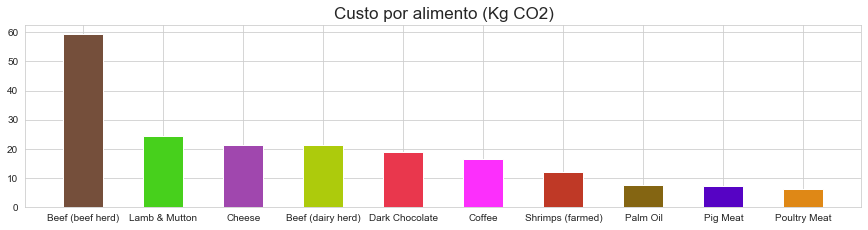

In [50]:
# Gráfico, somente dos X mais poluentes


quantidade_de_alimentos = 10
np.random.seed(35)
food_colors = []
for i in range(10):
    color_triplet_food = np.random.uniform(0,1,3)
    food_colors.append(color_triplet_food)
sns.set_style("whitegrid")
plt.subplots(figsize = (quantidade_de_alimentos * 1.2, 3))
plt.title("Custo por alimento (Kg CO2)", fontsize=17)
plt.tight_layout(pad=0)
plt.bar(x = sorted_alimentos_df["Alimento"][:quantidade_de_alimentos], height = sorted_alimentos_df["Emissão"][:quantidade_de_alimentos], width=0.5, color=food_colors);

Conseguimos ver que, para alimentar a população, é necessário emitir bastante CO2, principalmente para carnes de forma geral. E como já foi dito, esse é um dos dos custos de CO2 dos quais não podemos nos livrar. Por exemplo, podemos substituir motores à combustão por elétricos, ou substituir plásticos por papel, mas sempre teremos que nos alimentar. A única forma de diminuir a emissão de CO2 nesses processos seria se a população mundial decidisse parar de comer alimentos com alto custo de emissões, como carnes, o que não deve acontecer tão cedo.

Contudo, produção alimentícia não é a única atividade que produz gases estufa. Se conseguíssemos diminuir as emissões desses outros setores, certamente poderíamos acabar com o problema.

## Afinal, quem são os culpados?

Se o aquecimento global é uma ameaça real, devemos começar a lidar com ele o mais rápido possível. Para isso, a melhor forma seria reprimir os países que atualmente mais dependem de fontes fósseis, e forçá-los a adotarem fontes mais limpas.

Para sabermos quem são esses vilões, vamos analisar o consumo bruto de eletricidade produzida por combustíveis fósseis.

### Consumo, bruto

Lembrando, a análise está sendo feita nos países da lista `potencias`. Logo, não teremos uma visão com todos os países. Contudo, os países na lista são os protagonistas quando o assunto é aquecimento global.

In [15]:
# Criando o dicionário
dict_co2_depend = {}
for pais in potencias:
    dict_co2_depend[pais] = []


# Populando o dicionário
ano_inicial_c_bruto = 1980
ano_final_c_bruto = 2020
for index,row in world_energy_data.iterrows():
    if row.country in potencias:
        if row.year in range(ano_inicial_c_bruto, ano_final_c_bruto): # OBS: Isso é seguro de se fazer nesse csv, pois os dados estão organizados cronologicamente. (Explicado na seção Tratamento de Dados)
            if type(row.fossil_electricity == int) or type(row.fossil_electricity == float):
                dict_co2_depend[row.country].append(row.fossil_electricity)
            else: # Se não tem dados sobre esse ano, então colocamos a média do país até então
                dict_co2_depend[row.country].append(np.average(dict_co2_depend[row.country]))
        

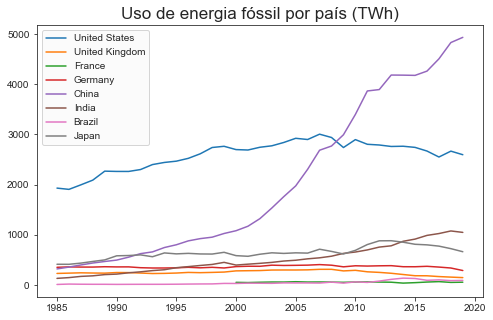

In [16]:
# Gráfico
sns.set_style("ticks")
plt.subplots(figsize = (8, 5))
plt.title("Uso de energia fóssil por país (TWh)", fontsize=17)
for pais, uso in dict_co2_depend.items():
    plt.plot(range(ano_inicial_c_bruto, ano_final_c_bruto), uso, label = pais)
    plt.legend(loc="upper left", facecolor="#FAFAFA")

Com o gráfico acima, podemos ver que, dos países selecionados, a China e os EUA são de longe os que mais consomem combustíveis fósseis. Podemos ver também que a Índia, e principalmente a China, tiveram um aumento considerável no consumo nos últimos anos. 

Portanto, o gráfico acima deixa bem claro quais países são responsáveis por toda essa confusão. Contudo, antes de apontarmos dedos, vamos dar uma chance a eles e fazer mais uma análise: **o quanto cada um deles consome de energia renovável.**

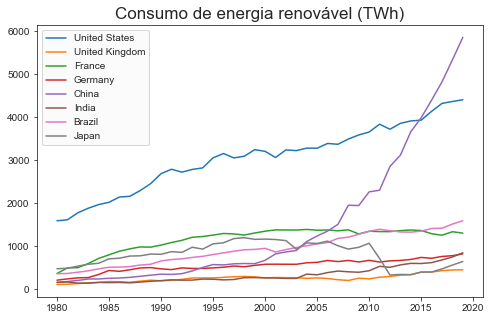

In [17]:
renew_energy = {}
for pais in potencias:
    renew_energy[pais] = []


for index,row in world_energy_data.iterrows():
    if row.country in potencias:
        if row.year in range(ano_inicial_c_bruto, ano_final_c_bruto):
            if type(row.low_carbon_consumption == int) or type(row.low_carbon_consumption == float):
                renew_energy[row.country].append(row.low_carbon_consumption)
            else: # Se não tem dados sobre esse ano, então colocamos a média do país até então
                renew_energy[row.country].append(np.average(renew_energy[row.country]))

plt.subplots(figsize=(8, 5))
plt.title("Consumo de energia renovável (TWh)", fontsize=17)
for pais, uso in renew_energy.items():
    plt.plot(range(ano_inicial_c_bruto, ano_final_c_bruto), uso, label = pais)
    plt.legend(loc="upper left", facecolor="#FAFAFA")

Então, aparentemente, a China e os Estados Unidos não são só os que mais consomem energia fóssil, mas renovável também. Isso nos leva à conclusão de que eles simplesmente usam mais energia do que o resto do mundo.

Agora demonstramos um fator importante neste estudo: ao analisar os dados, sempre devemos levar em conta a população do país. Assim, um país que precisa gerar energia suficiente para sustentar 1 bilhão de pessoas é comparado de forma justa com outro com apenas 50 milhões.

Tendo isso em mente, vamos analisar os dois últimos gráficos de uma forma mais correta.

### Consumo, per capita

Vamos rapidamente refazer os dois últimos gráficos, mas agora com os dados per capita.

In [18]:
# Primeiro, o da dependência de fósseis
dict_co2_per_capita = {}
for pais in potencias:
    dict_co2_per_capita[pais] = []

ano_inicial_c_per_capita = 1980
ano_final_c_per_capita = 2020
for index,row in world_energy_data.iterrows():
    if row.country in potencias:
        if row.year in range(ano_inicial_c_per_capita, ano_final_c_per_capita):
            if type(row.fossil_energy_per_capita == int) or type(row.fossil_energy_per_capita == float):
                dict_co2_per_capita[row.country].append(row.fossil_energy_per_capita)
            else:
                dict_co2_per_capita[row.country].append(np.average(dict_co2_per_capita[row.country]))


# Agora, o das energias renováveis
renew_energy_per_capita = {}
for pais in potencias:
    renew_energy_per_capita[pais] = []

for index,row in world_energy_data.iterrows():
    if row.country in potencias:
        if row.year in range(ano_inicial_c_per_capita, ano_final_c_per_capita):
            if type(row.renewables_elec_per_capita == int) or type(row.renewables_elec_per_capita == float):
                renew_energy_per_capita[row.country].append(row.renewables_elec_per_capita)
            else:
                renew_energy_per_capita[row.country].append(np.average(renew_energy_per_capita[row.country]))

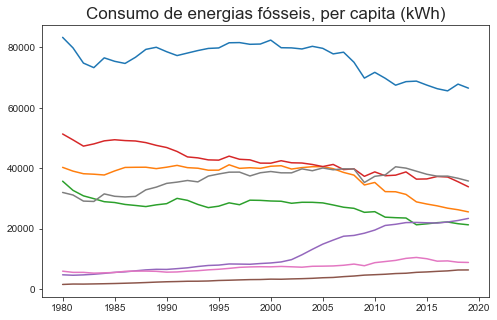

In [19]:
# Gráfico das fósseis

plt.subplots(figsize=(8, 5))
plt.title("Consumo de energias fósseis, per capita (kWh)", fontsize=17)
for pais, uso in dict_co2_per_capita.items():
    plt.plot(range(ano_inicial_c_per_capita, ano_final_c_per_capita), uso, label = pais)

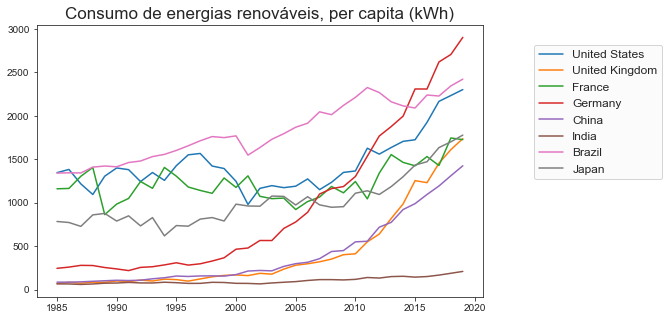

In [20]:
# Gráfico das renováveis
plt.subplots(figsize=(8, 5))
plt.title("Consumo de energias renováveis, per capita (kWh)", fontsize=17)
for pais, uso in renew_energy_per_capita.items():
    plt.plot(range(ano_inicial_c_per_capita, ano_final_c_per_capita), uso, label = pais)
    plt.legend(fontsize=12,loc="upper left", bbox_to_anchor=(1.1, 0.95), facecolor="#FAFAFA")

No gráfico de dependência fóssil, os países desenvolvidos ficam em evidência, principalmente os Estados Unidos, visto que o alto padrão de vida dos seus habitantes resulta em um maior uso de energia de forma geral.

Contudo, os países desenvolvidos também lideram o uso de energias renováveis, e são os que mais investiram recentemente no setor. A Alemanha por exemplo, tem uma curva quase exponencial. Vale notar a curva da China, que também vem demonstrando esforços para se modernizar. Dos países listados, somente a Índia aparenta ter um consumo baixo de energia limpa.

Com esses dois gráficos podemos ter uma visão mais correta da situação, mas podemos fazer melhor. O aquecimento global é um problema urgente, e não devemos perder tempo culpando uma nação pelo o quê ela fez ou não há mais de 10 anos, já que não podemos mais evitar que todo o combustível fóssil seja utilizado. O que realmente nos interessa é analisar os últimos anos, que nos mostram se um país está tomando medidas para reduzir suas emissões ou não.

Portanto, devemos fazer essa análise uma última vez, levando em conta somente anos recentes.

### Consumo, em porcentagem

Finalmente, vamos comparar a porcentagem de energia suja e limpa consumida por cada um dos paises listados. Como vamos comparar duas categorias para cada país, um pie chart será a forma mais adequada de mostrar os dados. Nele, vamos considerar as médias dos últimos 3 anos de cada país.

OBS: Se tiver mudado a lista `potencias`, certifique-se de mudar os parâmetros row e columns na segunda célula.

In [21]:
ultimos_x_anos = 4 # Lembrar que esse número é x-1. Ex: Se colocarmos 4, veremos a média dos últimos 3 anos.


# Dependência de fósseis
dict_co2_percent = {}
for pais in potencias:
    dict_co2_percent[pais] = []

ano_inicial = 1980
ano_final = 2020
for index,row in world_energy_data.iterrows():
    if row.country in potencias:
        if row.year in range(ano_inicial, ano_final):
            if type(row.fossil_share_energy == int) or type(row.fossil_share_energy == float):
                dict_co2_percent[row.country].append(row.fossil_share_energy)
            else:
                dict_co2_percent[row.country].append(np.average(dict_co2_percent[row.country]))


# Dependência de renováveis
renew_energy_percent = {}
for pais in potencias:
    renew_energy_percent[pais] = []

for index,row in world_energy_data.iterrows():
    if row.country in potencias:
        if row.year in range(ano_inicial, ano_final):
            if type(row.low_carbon_share_energy == int) or type(row.low_carbon_share_energy == float):
                renew_energy_percent[row.country].append(row.low_carbon_share_energy)
            else:
                renew_energy_percent[row.country].append(np.average(renew_energy_percent[row.country]))

# Demanda total de cada país
dict_energy_demand = {}
for pais in potencias:
    dict_energy_demand[pais] = sum(dict_co2_depend[pais][:-ultimos_x_anos:-1]) + sum(renew_energy[pais][:-ultimos_x_anos:-1])


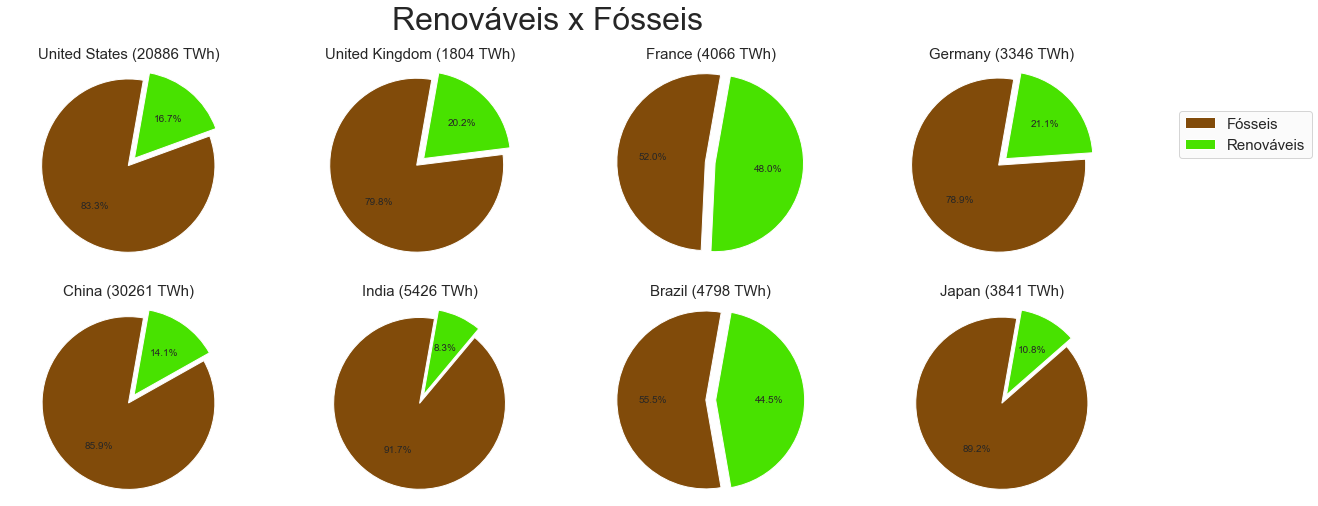

In [22]:
# Vamos fazer os 8 pie charts.

rows = 2 # Quantas linhas de gráficos
columns = 4 # Quantas colunas
h = 8 # Altura da imagem com os gráficos
l = 20 # Largura da imagem

figure, axis= plt.subplots(rows, columns, figsize=(l, h))
figure.suptitle("Renováveis x Fósseis", fontsize = 32)
# figure.patch.set_facecolor("#E2E2E2")
labels = ["Fósseis", "Renováveis"]
colors = ["#814B0A", "#48E200"]
explode = (0.1, 0) # Isso faz com que a primeira label na lista acima seja a que "saia" do gráfico

medias_renovaveis = {}
medias_fosseis = {}
# Populando os dicionários com as médias correspondentes dos ultimos x-1 anos
for pais in potencias:
    medias_fosseis[pais] = np.average(dict_co2_percent[pais][:-ultimos_x_anos:-1])
    medias_renovaveis[pais] = np.average(renew_energy_percent[pais][:-ultimos_x_anos:-1])

# Fazendo o gráfico para cada um dos países
current_row = 0
current_column = 0
for pais in potencias:
    emissions_data = [medias_fosseis[pais], medias_renovaveis[pais]]
    axis[current_row, current_column].pie(emissions_data, 
                                        #   labels=labels, 
                                          explode=explode, 
                                          autopct='%1.1f%%', 
                                        #   shadow=True,
                                          colors=colors,
                                          startangle=80,
                                          radius = 0.9,
                                          )
    axis[current_row, current_column].set_title(f"{pais} ({int(dict_energy_demand[pais])} TWh)", fontsize=15)
    axis[current_row, current_column].axis("equal")
    current_column += 1
    if current_column > 3:
        current_row += 1
        current_column = 0
    
plt.legend(fontsize=15,loc="upper left", bbox_to_anchor=(1.2, 2), labels=labels, facecolor="#FAFAFA")

Com os gráficos acima, podemos ter uma visão mais completa da matriz energética de cada um dos 8 países. Aqui vemos que, em média, os países desenvolvidos e em desenvolvimento têm na verdade aproximadamente a mesma fatia de consumo de energias fósseis e renováveis, com a exceção do Brasil e França, que se destacam com mais ou menos 45% de energia limpa.

Podemos concluir que quase todos os países ainda têm um longo caminho para se tornarem sustentáveis. Dos 8 países analisados, somente a França e o Brasil se destacam no uso de fontes renováveis. Contudo, é importante ressaltar a quantidade de energia que a China e os Estados Unidos consomem: eles consomem mais energia do que todos os outros países juntos. Portanto, apesar de todos terem o dever de reduzir suas emissões, esses 2 países têm a maior responsabilidade.

Ao longo dessa seção, concluímos que é injusto analisar de forma bruta os dados de consumo de combustíveis fósseis, visto que países mais populosos naturalmente irão ter um consumo maior de energia como um todo, e isso vai inevitavelmente incluir energia de fontes não renováveis.

Contudo, pode-se argumentar que há um certo nível de importância em realizar a análise desta forma. Afinal, a atmosfera não se importa com os números per capita, mas sim com cada tonelada de gases estufa emitida. Dessa forma, mesmo que a Índia, por exemplo, tenha um baixo nível de emissão per capita, o fato dela depender tanto de fontes não limpas ainda é relevante.

Vamos portanto, ver quem mais poluiu no total.

### Quem foi o maior poluidor?

Nesta seção, iremos analisar a quantidade total de CO2 lançado na atmosfera de 1950 até 2020.

In [23]:
# Para isso, vamos precisar de outro csv que contem a emissão de co2 de cada país
greenhouse_data = pd.read_csv("./data/co2-emissions.csv")


# Dependência de fósseis
dict_greenhouse_total = {}
for pais in potencias:
    dict_greenhouse_total[pais] = []

ano_inicial = 1950
ano_final = 2020
for index,row in greenhouse_data.iterrows():
    if row.country in potencias:
        if row.year in range(ano_inicial, ano_final):
            if type(row.co2 == int) or type(row.co2 == float):
                dict_greenhouse_total[row.country].append(row.co2)
            else:
                dict_greenhouse_total[row.country].append(np.average(dict_greenhouse_total[row.country]))

# Agora, vamos ver o total de cada lista
for pais, emissao in dict_greenhouse_total.items():
    dict_greenhouse_total[pais] = sum(emissao)

In [24]:
# Criando um DataFrame, para podermos organizar o gráfico
paises = pd.Series(dict_greenhouse_total.keys())
emissoes = pd.Series(dict_greenhouse_total.values())
paises_e_emisoes = {
    "Paises":paises,
    "Emissoes":emissoes
}
total_greenhouse_df = pd.DataFrame(paises_e_emisoes)

# Agora que temos o DataFrame, é fácil organizar ele
sorted_total_greenhouse_df = total_greenhouse_df.sort_values("Emissoes", ascending=False, axis=0)
sorted_total_greenhouse_df

,Paises,Emissoes
0,United States,322565.855
4,China,223104.183
3,Germany,63311.292
7,Japan,60579.943
5,India,50034.486
1,United Kingdom,39172.982
2,France,26770.143
6,Brazil,15535.672


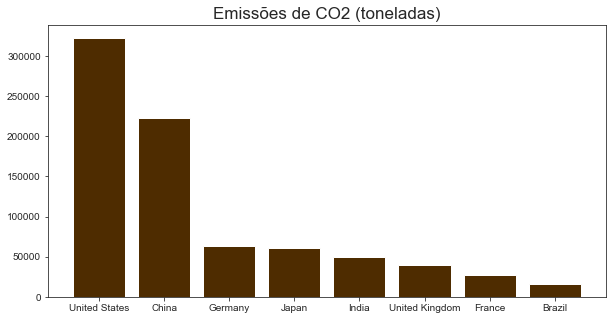

In [25]:
# Fazendo o gráfico
plt.subplots(figsize=(10, 5))
plt.title("Emissões de CO2 (toneladas)", fontsize=17)
plt.bar(x=sorted_total_greenhouse_df.Paises, height=sorted_total_greenhouse_df.Emissoes, color="#4E2C00");

Os Estados Unidos e China são de longe os que mais emitiram CO2 neste período.

Contudo, é importante ressaltar que o período que escolhemos para fazer nossa análise (1950-2019) favorece os países europeus, que durante o início da Revolução Industrial fizeram amplo uso de combustíveis fósseis, e atualmente têm recursos para investir em tecnologias mais limpas, ou comprar produtos de países em desenvolvimento.

Podemos concluir então que, de forma geral, todos os países, em desenvolvimento ou desenvolvidos, fizeram ou fazem amplo uso de fontes não renováveis para alimentar sua economia. De forma geral, a diferença entre os dois grupos é que enquanto o primeiro está emitindo agora, o segundo já emitiu no passado.

De qualquer forma, como já foi dito, não devemos nos preocupar com o passado: devemos nos esforçar para que cada vez mais países consigam adotar as fontes limpas de energia, deixando-as mais acessíveis a todos. Na próxima seção, vamos analisar esse progresso.

## Adoção das fontes renováveis

Agora que vimos um resumo das matrizes energéticas dos países, vamos focar na parte das energias limpas.

Na última seção, discutimos como países desenvolvidos em geral têm mais acesso às tecnologias renováveis. Vamos verificar essa declaração, relacionando o PIB de um país com a porcentagem de sua matriz energética que é renovável.

In [26]:
gdp_data = pd.read_csv("./data/country-gdp.csv")


dict_pib_e_energia = {}



ano = 2016
for index, row in gdp_data.iterrows():
    if index >= 2308:
        if row.Year == ano:
            dict_pib_e_energia[row["Country Name"]] = [row.Value]

for index,row in world_energy_data.iterrows():
    if row.year == ano:
        if  row.country in dict_pib_e_energia:
            if not math.isnan(row.low_carbon_share_energy):
                dict_pib_e_energia[row.country].append(row.low_carbon_share_energy)
            else: # Se a informação não é válida, não vamos precisar desse país
                del dict_pib_e_energia[row.country]


In [27]:
gdps = []
porcentagens = []
paises = []



for pais , valores in dict_pib_e_energia.items():
    if len(valores) == 2:
        gdps.append(valores[0])
        porcentagens.append(valores[1])
        paises.append(pais)




pais = pd.Series(paises)
gdp = pd.Series(gdps)
energia = pd.Series(porcentagens)

gdp_energia = {
    "País" : pais,
    "PIB" : gdp,
    "Porcentagem limpa" : energia
}

gdp_energia_df = pd.DataFrame(gdp_energia)
gdp_energia_df

,País,PIB,Porcentagem limpa
0,Algeria,1.590491e+11,0.137
1,Argentina,5.454761e+11,14.066
2,Australia,1.204616e+12,7.207
3,Austria,3.908000e+11,33.768
4,Azerbaijan,3.784772e+10,3.125
...,...,...,...
64,United Arab Emirates,3.487433e+11,0.067
65,United Kingdom,2.647899e+12,18.010
66,United States,1.862448e+13,16.164
67,Uzbekistan,6.722034e+10,3.724


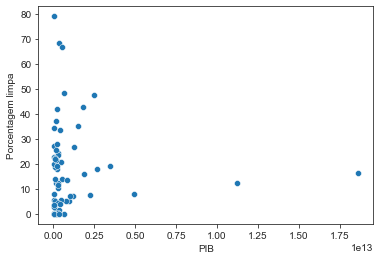

In [28]:
sns.scatterplot(data=gdp_energia_df, x="PIB", y="Porcentagem limpa");

Podemos ver agora que o PIB de um país não é uma boa maneira de fazer essa análise, pois países como os EUA e a China possuem um GDP tão alto que acabam distorcendo a escala. Sem contar que o GDP não é o melhor indicador do desenvolvimento do país. Esse seria o IDH. Vamo então refazer o gráfico acima, mas agora com esse novo indicador:

In [29]:
hdi_data = pd.read_csv("./data/human-development-index.csv")


dict_hdi_e_energia = {}



ano = 2016
for index, row in hdi_data.iterrows():
    if row.Year == ano:
        dict_hdi_e_energia[row["Entity"]] = [row["Human Development Index (UNDP)"]]

for index,row in world_energy_data.iterrows():
    if row.year == ano:
        if  row.country in dict_hdi_e_energia:
            if not math.isnan(row.low_carbon_share_energy):
                dict_hdi_e_energia[row.country].append(row.low_carbon_share_energy)
            else: # Se a informação não é válida, não vamos precisar desse país
                del dict_hdi_e_energia[row.country]

hdis = []
porcentagens = []
paises = []

for pais , valores in dict_hdi_e_energia.items():
    if len(valores) == 2:
        hdis.append(valores[0])
        porcentagens.append(valores[1])
        paises.append(pais)

pais = pd.Series(paises)
hdi = pd.Series(hdis)
energia = pd.Series(porcentagens)

hdi_energia = {
    "País" : pais,
    "IDH" : hdi,
    "Porcentagem limpa" : energia
}

hdi_energia_df = pd.DataFrame(hdi_energia)

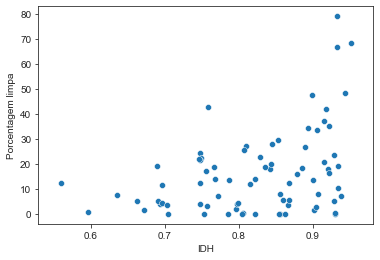

In [30]:
sns.scatterplot(data=hdi_energia_df, x="IDH", y="Porcentagem limpa");

Com o gráfico acima, podemos ver que, na realidade, o IDH do país só indica se ele tem alguma chance de ter uma alta porcentagem de energia limpa, mas não o garante.

Contudo, IDH e PIB devem estar interconectados. Teoricamente, quanto mais dinheiro um país produz, melhor a qualidade de vida dos seus habitantes. Mas dessa vez, não vamos analisar o PIB do país, mas sim o PCI, que leva em conta a população também, visto que se analisássemos o PIB antes, com certeza algo parecido com o primeiro gráfico (escala distorcida) iria ocorrer.

In [31]:
ano = 2016

dict_pic_hdi_e_energia = {}



ano = 2016
for index, row in hdi_data.iterrows():
    if row.Year == ano:
        dict_pic_hdi_e_energia[row["Entity"]] = [row["Human Development Index (UNDP)"]]

for index,row in world_energy_data.iterrows():
    if row.year == ano:
        if  row.country in dict_pic_hdi_e_energia:
            if not math.isnan(row.low_carbon_share_energy):
                dict_pic_hdi_e_energia[row.country].append(row.low_carbon_share_energy)
            else: # Se a informação não é válida, não vamos precisar desse país
                del dict_pic_hdi_e_energia[row.country]

for index, row in world_energy_data.iterrows():
    if row.year == ano:
        if row.country in dict_pic_hdi_e_energia:
            if not math.isnan(row.gdp) and not math.isnan(row.population):
                dict_pic_hdi_e_energia[row.country].append(row.gdp/row.population)
                dict_pic_hdi_e_energia[row.country].append(row.gdp)
                dict_pic_hdi_e_energia[row.country].append(row.population)
            else:
                del dict_pic_hdi_e_energia[row.country]

hdis = []
pics = []
porcentagens = []
paises = []
gdps = []
populacoes = []

for pais , valores in dict_pic_hdi_e_energia.items():
    if len(valores) == 5:
        hdis.append(valores[0])
        porcentagens.append(valores[1])
        pics.append(valores[2])
        gdps.append(valores[3])
        populacoes.append(valores[4])
        paises.append(pais)

pais = pd.Series(paises)
hdi = pd.Series(hdis)
energia = pd.Series(porcentagens)
pic = pd.Series(pics)
gdp = pd.Series(gdps)
populacao = pd.Series(populacoes)

hdi_e_pic_energia = {
    "País" : pais,
    "IDH" : hdi,
    "Populacao" : populacao,
    "PIB" : gdp,
    "PIC" : pic,
    "Porcentagem limpa" : energia
}

hdi_e_pic_energia_df = pd.DataFrame(hdi_e_pic_energia)

In [32]:
hdi_e_pic_energia_df.head()

,País,IDH,Populacao,PIB,PIC,Porcentagem limpa
0,Algeria,0.753,40551000.0,5.340000e+11,13168.602501,0.137
1,Argentina,0.822,43508000.0,8.200000e+11,18847.108578,14.066
2,Australia,0.938,24263000.0,1.070000e+12,44100.070066,7.207
3,Austria,0.906,8747000.0,3.950000e+11,45158.340002,33.768
4,Azerbaijan,0.757,9736000.0,1.450000e+11,14893.179951,3.125


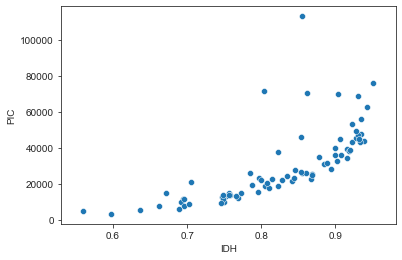

In [33]:
sns.scatterplot(data=hdi_e_pic_energia_df, x="IDH", y="PIC");

Podemos ver uma clara conexão entre os dois. Para terminar, vamos refazer o gráfico acima, no qual as cores representarão o quão verde o país é.

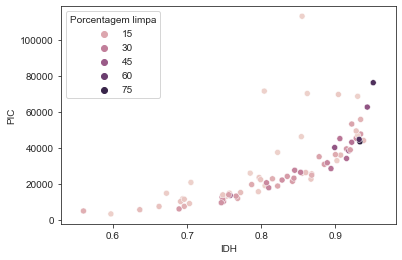

In [34]:
sns.light_palette("seagreen", as_cmap=True)
sns.scatterplot(data=hdi_e_pic_energia_df, x="IDH", y="PIC", hue="Porcentagem limpa");

Continuamos com uma conexão, mas dessa vez não tão forte. De acordo com o gráfico, ter uma matriz energética limpa se correlaciona diretamente com o quão desenvolvido o país é, mas o inverso não é verdade. Isso é curioso, pois iríamos supor que se um país tem condições, ele iria optar por tecnologias mais verdes, afinal o futuro do planeta depende disso.



Agora que verificamos a relação entre os indicadores socioeconômicos de um país com o quão limpa sua matriz é, vamos analisar qual a principal tecnologia verde usada por cada um. Vamos incluir as seguintes tecnologias:

* Biocombustíveis;
* Hidroelétricas;
* Nuclear;
* Solar;
* Eólica
* Outras, como geotérmica.

In [35]:
ano = 2016

dict_hdi_e_energia_prct = {}

typ_of_elec = [
    "biofuel_share_elec",
    "hydro_share_energy",
    "nuclear_share_energy",
    "solar_share_energy",
    "wind_share_energy",
    "other_renewables_share_energy"
]

ano = 2016
for index, row in hdi_data.iterrows():
    if row.Year == ano: # Primeiro botando os nomes e os HDIs
        dict_hdi_e_energia_prct[row["Entity"]] = [row["Human Development Index (UNDP)"]]

for index,row in world_energy_data.iterrows():
    if row.year == ano:
        if  row.country in dict_hdi_e_energia_prct:
            for energy_type in typ_of_elec: # iterando sobre cada tipo de energia
                if not math.isnan(row[f"{energy_type}"]):
                    dict_hdi_e_energia_prct[row.country].append(row[f"{energy_type}"])
                else: # se não temos dados sobre o país, não vamos incluir ele no estudo
                    del dict_hdi_e_energia_prct[row.country]
                    break

In [36]:
paises_energy_shares = []
hdis_energy_shares = []
biofuel_shares = []
hydro_shares = []
nuclear_shares= []
solar_shares = []
wind_shares = []
other_shares = []

for pais, shares in dict_hdi_e_energia_prct.items():
    if len(shares) == 7: # Só queremos incluir aqueles sobre os quais temos os dados completos
        paises_energy_shares.append(pais)
        hdis_energy_shares.append(shares[0])
        biofuel_shares.append(shares[1])
        hydro_shares.append(shares[2])
        nuclear_shares.append(shares[3])
        solar_shares.append(shares[4])
        wind_shares.append(shares[5])
        other_shares.append(shares[6])

paises_e_s= pd.Series(paises_energy_shares)
hdis_e_s = pd.Series(hdis_energy_shares)
biofuel_shares = pd.Series(biofuel_shares)
hydro_shares = pd.Series(hydro_shares)
nuclear_shares = pd.Series(nuclear_shares)
solar_shares = pd.Series(solar_shares)
wind_shares = pd.Series(wind_shares)
other_shares = pd.Series(other_shares)

hdi_e_energy_shares = {
    "País" : paises_e_s,
    "IDH" : hdis_e_s,
    "Biocombustível" : biofuel_shares,
    "Hidroelétrica" : hydro_shares,
    "Nuclear" : nuclear_shares,
    "Solar" : solar_shares,
    "Eólica" : wind_shares,
    "Outras" : other_shares
}

hdi_e_energy_shares_df = pd.DataFrame(hdi_e_energy_shares)

In [37]:
hdi_e_energy_shares_df.head()

,País,IDH,Biocombustível,Hidroelétrica,Nuclear,Solar,Eólica,Outras
0,Algeria,0.753,0.000,0.029,0.000,0.100,0.008,0.000
1,Argentina,0.822,0.871,9.684,2.097,0.004,0.139,0.497
2,Australia,0.938,1.531,2.713,0.000,1.150,2.005,0.562
3,Austria,0.906,7.326,25.187,0.000,0.693,3.309,2.965
4,Azerbaijan,0.757,0.738,2.910,0.000,0.052,0.034,0.130


Vamos fazer um gráfico para 3 das 4 categorias de IDH:

* Muito alto - (0.80 - 1.00)
* Alto - (0.70 - 0.79)
* Médio - (0.55 - 0.69)
* Baixo - (0.00 - 0.55)

Não vamos fazer da categoria "baixo" pois infelizmente não temos dados suficientes sobre países com esse IDH no nosso dataset.

In [38]:
# Primeiro, vamos preencher as seguintes 5 listas

medias_muito_alto = [0, 0, 0, 0, 0, 0]
medias_alto = [0, 0, 0, 0, 0, 0]
medias_medio = [0, 0, 0, 0, 0, 0]
medias_baixo = [0, 0, 0, 0, 0, 0]

# Vamos somar todas as porcentagens dos países em cada categoria,
# depois dividir por esses números
qntd_paises_muito_alto = 0
qntd_paises_alto = 0
qntd_paises_medio = 0
qntd_paises_baixo = 0

tipos_de_elec = [
    "Biocombustível",
    "Hidroelétrica",
    "Nuclear",
    "Solar",
    "Eólica",
    "Outras"
]



def botar_porcentagens_na_lista(lista):
    lista[0] += row["Biocombustível"]
    lista[1] += row["Hidroelétrica"]
    lista[2] += row["Nuclear"]
    lista[3] += row["Solar"]
    lista[4] += row["Eólica"]
    lista[5] += row["Outras"]

def pegar_media_da_lista(lista, qntd_paises):
    lista[0] = lista[0] / qntd_paises
    lista[1] = lista[1] / qntd_paises
    lista[2] = lista[2] / qntd_paises
    lista[3] = lista[3] / qntd_paises
    lista[4] = lista[4] / qntd_paises
    lista[5] = lista[5] / qntd_paises

for index, row in hdi_e_energy_shares_df.iterrows():
    if row["IDH"] >= 0.8:
        botar_porcentagens_na_lista(medias_muito_alto)
        qntd_paises_muito_alto += 1
    elif row["IDH"] >= 0.7:
        botar_porcentagens_na_lista(medias_alto)
        qntd_paises_alto += 1
    elif row["IDH"] >= 0.55:
        botar_porcentagens_na_lista(medias_medio)
        qntd_paises_medio += 1
    else:
        botar_porcentagens_na_lista(medias_baixo)
        qntd_paises_baixo += 1 # :(

pegar_media_da_lista(medias_muito_alto, qntd_paises_muito_alto)
pegar_media_da_lista(medias_alto, qntd_paises_alto)
pegar_media_da_lista(medias_medio, qntd_paises_medio)
# Não temos países com IDH 'baixo' no nosso df
# pegar_media_da_lista(medias_baixo, qntd_paises_baixo)

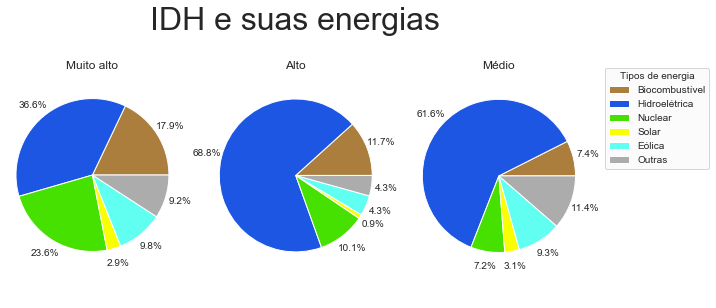

In [39]:

listas_das_medias = [medias_muito_alto, medias_alto, medias_medio]
categorias_de_hdi = ["Muito alto", "Alto", "Médio"]
cores_hdi = [
    "#AB7E3D", # meio marrom
    "#1D56E2", # água
    "#46E100", # verdesasso
    "#F9FF00", # sol
    "#60FFF2", # azul claro
    "#ACACAC" # cinza (qualquer coisa)
]

figure_hdi, axis_hdi = plt.subplots(1, 3, figsize=(10,7))

for i in range(3):
    # print(categoria)
    axis_hdi[i].pie(listas_das_medias[i], 
                    # labels=typ_of_elec,
                    # labeldistance=None,
                    pctdistance= 1.2, 
                    colors=cores_hdi, 
                    radius = 0.2,
                    autopct='%1.1f%%')
    axis_hdi[i].set_title(categorias_de_hdi[i], y=0.9)
    axis_hdi[i].axis("equal")
plt.legend(labels=tipos_de_elec, title="Tipos de energia", bbox_to_anchor=(1.1, 0.95), facecolor="#FAFAFA")
figure_hdi.suptitle("IDH e suas energias", fontsize = 32)
# figure_hdi.patch.set_facecolor("#E2E2E2")
#figure_hdi.tight_layout()
figure_hdi.subplots_adjust(bottom=0.3, wspace=0.2, hspace=0, left=0.1)
figure_hdi.set_figheight(6)

As hidrelétricas são predominantes em todos os tipos de IDH, visto que só depende de um recurso que quase todo país tem: quedas d'água, além de ser barata. No outro lado do espectro, vemos que quase não há uso de energia solar. É interessante notar que, em média, a nuclear é responsável por quase 25% da produção dos países com IDH muito alto, mas essa porcentagem cai para apenas 7% naqueles com IDH médio. Provavelmente, isso se deve ao alto custo e longo período de tempo necessários para construir uma usina nuclear.

Como um adendo, vamos analisar a energia solar e nuclear em mais detalhes.

## Análise das renováveis

Nesta seção, vamos analisar como 2 das fontes energéticas limpas devem se comportar no futuro: solar e nuclear. Escolhi solar pois achei interessante o fato dela estar tão abaixo das outras no último gráfico, e nuclear pois, na minha opinião, é a mais interessante e promissora das alternativas.

### Solar

Vamos analisar o por quê da solar ser tão pouco usada. Para isso, vamos comparar o seu custo com o das outras renováveis.

OBS: não incluí nuclear, já que apesar de ser uma tecnologia limpa, não é renovável.

In [40]:
energy_cost_data = pd.read_csv("./data/levelized-cost-of-energy.csv")

types_of_energy = ["CSP LCOE (2019 USD/kWh)",
                   "Hydro LCOE (2019 USD/kWh)", 
                   "Solar LCOE (2019 USD/kWh)", 
                   "Onshore wind LCOE (2019 USD/kWh)", 
                   "Bioenergy LCOE (2019 USD/kWh)", 
                   "Geothermal LCOE (2019 USD/kWh)", 
                   "Offshore wind LCOE (2019 USD/kWh)"]


cost_per_energy = {tipo:[] for tipo in types_of_energy}


ano = 2010
for index, row in energy_cost_data.iterrows():
    if index > 385:
        break

    if index > 375: # O csv não está muito bem organizado
        for tipo in types_of_energy:
            row[f"{tipo}"]
            cost_per_energy[tipo].append(row[f"{tipo}"])

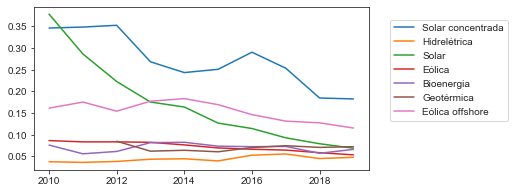

In [61]:
tipos_de_energia = ["Solar concentrada",
                   "Hidrelétrica", 
                   "Solar", 
                   "Eólica", 
                   "Bioenergia", 
                   "Geotérmica", 
                   "Eólica offshore"]

index = 0
plt.subplots(figsize=(6,3))
for tipo, custos in cost_per_energy.items():
    plt.plot(list(range(2010, 2020)), custos, label = tipos_de_energia[index])
    plt.legend(loc="upper left", bbox_to_anchor=(1.05, 0.95))
    index += 1

* CSP = Concentrated Solar Power (Energia Solar Concentrada);

* LCOE = Levelized Cost of Energy; Estima o custo médio por kWh de um determinado tipo de usina ao longo de toda sua vida útil.

Com o gráfico acima, fica claro que as energias solares são as que mais vêm se barateando. Contudo, é importante notar que essa queda só é possível devido ao alto custo dessas energias no ínicio do gráfico.Podemos assumir que a CSP vai continuar se barateando, provavelmente até alcançar as outras energias, como as fotovoltaicas fizeram.

Se as solares, principalmente fotovoltaicas, estão se barateando tão rapidamente, por quê não são mais usadas?

A CSP, não é apropriada para alimentar uma nação inteira, visto que ela depende de um fator extremamente volátil para funcionar: o quão ensolarado está. Se um país dependesse somente dessa energia, em dias nublados ele iria ter que importar eletricidade de outros países, o que suprime qualquer incentivo de implantar essa tecnologia em larga escala.

A fotovoltaica também tem esse problema, mas ao contrário das CSP ela pode ser usada em pequena escala, como no telhado de uma casa. Isso faz com que se tenha uma alta demanda por ela, que por sua vez incentiva a pesquisa pela diminuição dos seus custos.

### Nuclear

Vamos agora analisar a produção de energia nuclear em 7 países, de 2000 até 2020, em TWh.

In [42]:

# Ver se não seria mais legal usar a lista potencias


nuclear_inicio = 2000
nuclear_final = 2021

nuclear_paises = ["United States", "United Kingdom", "France", "Germany", "China", "India", "Japan"]

dict_nuclear_uso = {pais:[] for pais in nuclear_paises}

dict_nuclear_pct = {pais:[] for pais in nuclear_paises}

for index, row in world_energy_data.iterrows():
    if row.country in nuclear_paises and row.year in range(nuclear_inicio, nuclear_final):
        dict_nuclear_uso[row.country].append(row.nuclear_electricity)
        dict_nuclear_pct[row.country].append(row.nuclear_share_elec)


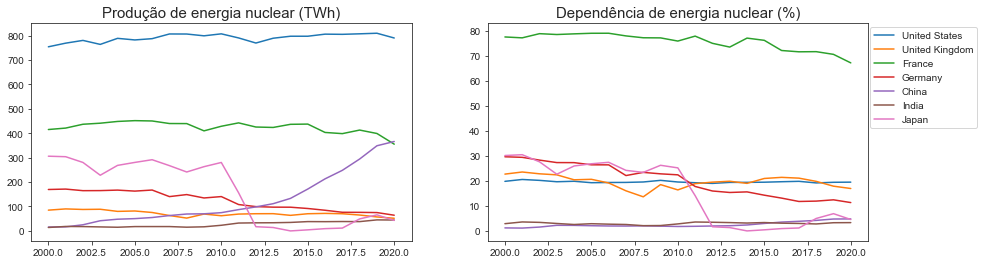

In [63]:
figure, axis = plt.subplots(1, 2, figsize = (15, 4))
for pais, consumo in dict_nuclear_uso.items():
    axis[0].plot(range(nuclear_inicio, nuclear_final), consumo)
    axis[0].set_title("Produção de energia nuclear (TWh)", fontsize=15)
for pais, consumo in dict_nuclear_pct.items():
    axis[1].plot(range(nuclear_inicio, nuclear_final), consumo)
    axis[1].set_title("Dependência de energia nuclear (%)", fontsize=15)
plt.legend(loc="center right", labels=nuclear_paises, bbox_to_anchor=(1.3, 0.75))

Nos gráficos acima, 3 dos 7 países se mantiveram no mesmo nível ao longo dos 10 anos. Mas os outros 4 nos revelam dados interessantes.

#### Aqueles que estão se livrando da nuclear

O Japão e a Alemanha estão perceptivelmente diminuindo sua produção nuclear. Mas por quê?

Ambos os países temem o acidente que ocorreu em uma usina nuclear de Fukushima, em 2011. O Japão teve uma resposta mais imediata, quase zerando sua produção nuclear após apenas 3 anos. Já a Alemanha está tendo uma diminuição mais gradual.

#### Os que acreditam na nuclear

A China foi um dos únicos países no mundo que tiveram um aumento perceptível no uso da nuclear. Isso se deve à preocupações com a qualidade do ar, falta de combustíveis fósseis e mudança climática. A China pretende continuar investindo na tecnologia, visando até mesmo possibilitar a construção de reatores de fusão nuclear.

A energia nuclear compõe 70% da matriz energética francesa, a maior porcentagem do mundo.